# Mudcard
- **Sometimes I cannot remember the code, so when I write the code, I have to check the sample code above.**
    - That's fine, I do the same. Also, I still always need to check the manual to remember arguments and syntax.
- **I noticed there was no space before "doctorate," so I would like to learn how I can code it without just manually adding a space in front of it.**
    - I'm not sure what you mean. You just need to manually add the space.
- **join and merge? is it only different that one is in pandas and the other is in polar?**
    - Nope. Both packages can do all the operations we discussed in class.
    - Merge means that you place dataframes next to each other and figure out based on the type of the merge how to combine rows/columns
    - Append means that you place dataframes vertically (one below the other). Rows are not merged but additional columns might need to be added if a column is only in one of the dataframes.
    - Please play around with the code and print out the dataframes to better understand what's going on
- **in the example with the space in front of ' doctorate', should we always assume that the dataframe is messed up or disorganized?**
    - I'd just open the csv file either in jupyter-lab or with excel and take a look at the cells
- **Is there a function to append polars? You only talked about append function for pandas.**
    - Yes, you can also append dataframes in polars. Should be in the lecture 3 notes. If it's not there, just google it.
- **A background on overall python syntax before jumping into pd and pl**
    - We unfortunately don't have time for that.
    - I hope you attended the DSCoV workshop on intro python last Friday. It was announced on Ed.
- **i was a bit confused by the concept of left/right in regards to merge. Is top to bottom considered left to right when it prints? What is the best way to think about this?**
    - I'd suggest to work with the code, add print statements, and check yourself what the merged dataframe is for the various merge types

# <center> Lecture 4: Exploratory data analysis in python</center>

# The supervised ML pipeline

**0. Data collection/manipulation**: you might have multiple data sources and/or you might have more data than you need
   - you need to be able to read in datasets from various sources (like csv, excel, SQL, parquet, etc)
   - you need to be able to filter the columns/rows you need for your ML model
   - you need to be able to combine the datasets into one dataframe 

<span style="background-color: #FFFF00">**1. Exploratory Data Analysis (EDA)**: you need to understand your data and verify that it doesn't contain errors</span>
   - do as much EDA as you can!
    
**2. Split the data into different sets**: most often the sets are train, validation, and test (or holdout)
   - practitioners often make errors in this step!
   - you can split the data randomly, based on groups, based on time, or any other non-standard way if necessary to answer your ML question

**3. Preprocess the data**: ML models only work if X and Y are numbers! Some ML models additionally require each feature to have 0 mean and 1 standard deviation (standardized features)
   - often the original features you get contain strings (for example a gender feature would contain 'male', 'female', 'non-binary', 'unknown') which needs to be transformed into numbers
   - often the features are not standardized (e.g., age is between 0 and 100) but it needs to be standardized
    
**4. Choose an evaluation metric**: depends on the priorities of the stakeholders
   - often requires quite a bit of thinking and ethical considerations
     
**5. Choose one or more ML techniques**: it is highly recommended that you try multiple models
   - start with simple models like linear or logistic regression
   - try also more complex models like nearest neighbors, support vector machines, random forest, etc.
    
**6. Tune the hyperparameters of your ML models (aka cross-validation or hyperparameter tuning)**
   - ML techniques have hyperparameters that you need to optimize to achieve best performance
   - for each ML model, decide which parameters to tune and what values to try
   - loop through each parameter combination
       - train one model for each parameter combination
       - evaluate how well the model performs on the validation set
   - take the parameter combo that gives the best validation score
   - evaluate that model on the test set to report how well the model is expected to perform on previously unseen data
    
**7. Interpret your model**: black boxes are often not useful
   - check if your model uses features that make sense (excellent tool for debugging)
   - often model predictions are not enough, you need to be able to explain how the model arrived to a particular prediction (e.g., in health care)

# <center> Learning objectives </center>
### By the end of this lecture, you will be able to
   - visualize one column (categorical, ordinal, and continuous data)
   - visualize column pairs (all variations of continuous and categorical columns)
   - visualize multiple columns simultaneously

## Dataset of the day

Adult dataset, see [here](https://archive.ics.uci.edu/ml/datasets/Adult)

## Packages of the day

matplotlib and pandas

### <font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
   - **visualize one column (categorical, ordinal, and continuous data)**
   - <font color='LIGHTGRAY'>visualize column pairs (all variations of continuous and categorical columns)</font>
   - <font color='LIGHTGRAY'>visualize multiple columns simultaneously</font>


## Data types
- **continuous data**: represented by floating point numbers usually (not always), it is a measured quantity with some unit of measurement (not always)
   - age measured in years
   - distance measured in km or miles
   - weight measured in kg or lbs
   - rates are dimensionless but usually continuous e.g., click-through rates
- **ordinal data**: not continuous data, there are a small number of categories and the categories can be ordered
   - satisfaction levels (satisfied, moderately satisfied, not satisfied)
   - ratings (1-5 stars or ratings like fair, average, good, excellent)
   - time categories like day of the week, month of the year
   - education level
- **categorical data**: there are a small number of categories and the categories cannot be ordered
   - demographic info like race, gender, or marital status
   - blood type
   - eye color
   - type of rock (igneous, sedimentary or metamorphic)

A feature's data type can sometimes be context-dependent or unclear! 
   - e.g., blood type could be considered ordinal in certain medical situations.
   - Would people's birth year be continuous or ordinal?

##  Let's load the data first!

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
df = pd.read_csv('../data/adult_data.csv')
print(df.dtypes) 

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
gross-income      object
dtype: object


### Column is continuous

In [2]:
print(df['age'].describe())

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64


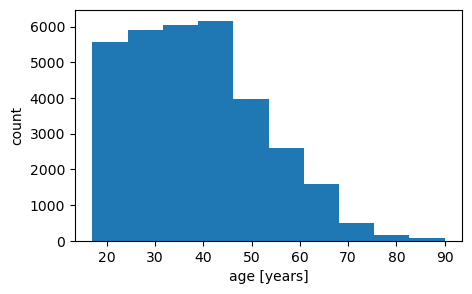

In [3]:
plt.figure(figsize=(5,3))

df['age'].plot.hist()   # bins = int(np.sqrt(df.shape[0])) 
                        # bins = df['age'].nunique()
plt.xlabel('age [years]')
plt.ylabel('count')
plt.show()

[1.00000000e+00 1.26485496e+00 1.59985807e+00 2.02358841e+00
 2.55954583e+00 3.23745424e+00 4.09491005e+00 5.17946728e+00
 6.55127487e+00 8.28641251e+00 1.04811100e+01 1.32570839e+01
 1.67682883e+01 2.12094526e+01 2.68268813e+01 3.39321138e+01
 4.29192025e+01 5.42865661e+01 6.86646323e+01 8.68508006e+01
 1.09853666e+02 1.38948954e+02 1.75750273e+02 2.22298605e+02
 2.81175493e+02 3.55646216e+02 4.49840880e+02 5.68983468e+02
 7.19681561e+02 9.10292791e+02 1.15138835e+03 1.45633926e+03
 1.84205794e+03 2.32993612e+03 2.94703125e+03 3.72756709e+03
 4.71483172e+03 5.96357829e+03 7.54306157e+03 9.54087883e+03
 1.20678279e+04 1.52640520e+04 1.93068118e+04 2.44203166e+04
 3.08881586e+04 3.90690406e+04 4.94166697e+04 6.25049197e+04
 7.90596576e+04 9.99990000e+04]


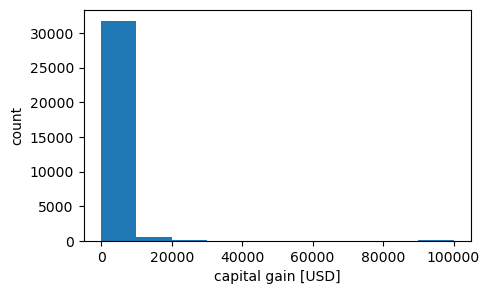

In [4]:
plt.figure(figsize=(5,3))

print(np.logspace(np.log10(1),np.log10(np.max(df['capital-gain'])),50))

df['capital-gain'].plot.hist() # log=True, bins = np.logspace(np.log10(1),np.log10(np.max(df['capital-gain'])),50)
#plt.semilogy()
#plt.semilogx()
plt.xlabel('capital gain [USD]')
plt.ylabel('count')
plt.show()


### Column is categorical

In [5]:
print(df['occupation'].value_counts())

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64


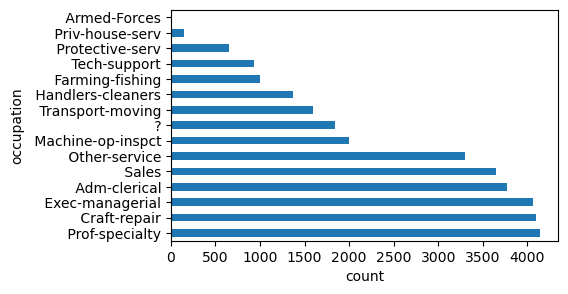

In [6]:
plt.figure(figsize=(5,3))
df['occupation'].value_counts().plot.barh()
plt.xlabel('count')
plt.ylabel('occupation')
plt.show()

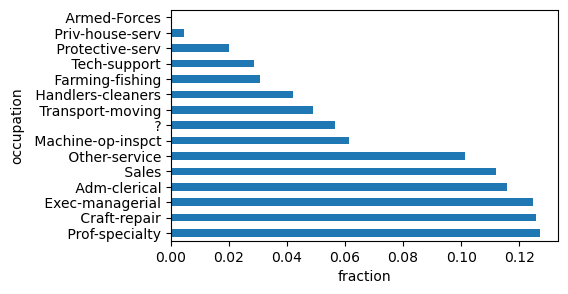

In [7]:
plt.figure(figsize=(5,3))
df['occupation'].value_counts(normalize=True).plot.barh()
plt.xlabel('fraction')
plt.show()

# Quiz 1
- What's wrong with this figure?

<center><img src="../figures/GA-graph-before.png" width="600"></center>


## Ordinal features

[//]: <center><img src="../figures/GA-graph-after.png" width="600"></center>

- other examples of ordinal features:
    - measure of quality (e.g., bad, average, good, excellent)
    - socioeconomic status (e.g., low income, middle income, high income)
    - education level (e.g., 8th grade, high school, BSc, MSc, PhD)
    - satisfaction rating (e.g., dislike, neutral, like)
    - time (e.g., days of the week, months, years)
    

## The categories of an ordinal feature must be visualized in the correct order! 

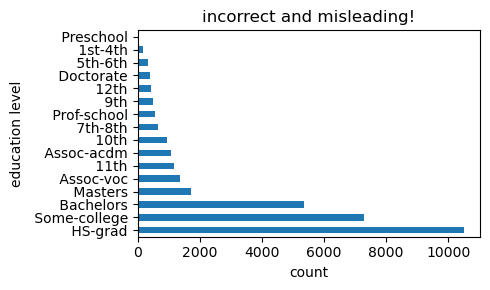

In [8]:
plt.figure(figsize=(5,3))
df['education'].value_counts().plot.barh()
plt.xlabel('count')
plt.ylabel('education level')
plt.title('incorrect and misleading!')
plt.tight_layout()
plt.show()

In [9]:
df['education'].value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [10]:
correct_order = [' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', \
         ' 12th', ' HS-grad', ' Some-college', ' Assoc-voc', ' Assoc-acdm', ' Bachelors',\
         ' Masters', ' Prof-school', ' Doctorate']

df['education'].value_counts().reindex(correct_order)

education
Preschool          51
1st-4th           168
5th-6th           333
7th-8th           646
9th               514
10th              933
11th             1175
12th              433
HS-grad         10501
Some-college     7291
Assoc-voc        1382
Assoc-acdm       1067
Bachelors        5355
Masters          1723
Prof-school       576
Doctorate         413
Name: count, dtype: int64

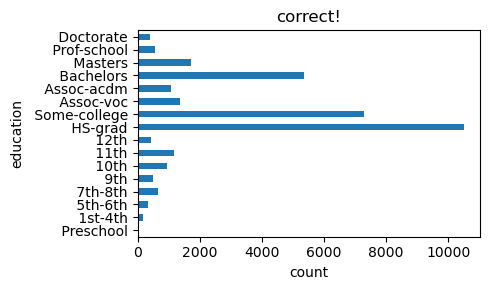

In [11]:
plt.figure(figsize=(5,3))

df['education'].value_counts().reindex(correct_order).plot.barh()
plt.xlabel('count')
plt.ylabel('education')
plt.title('correct!')
plt.tight_layout()
plt.show()

### <font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
   - <font color='LIGHTGRAY'> visualize one column (categorical, ordinal, and continuous data)</font>
   - **visualize column pairs (all variations of continuous and categorical columns)**
   - <font color='LIGHTGRAY'>visualize multiple columns simultaneously</font>


## <center> Overview </center>

| *Visualization types* | column continuous | column categorical |
| --- | :-: | :-: |
| __column continuous__    	| scatter plot, heatmap 	| category-specific histograms, box plot, violin plot |
| __column categorical__   	| category-specific histograms, box plot, violin plot |  stacked bar plot  	|


### Continuous vs. continuous columns
- scatter plot

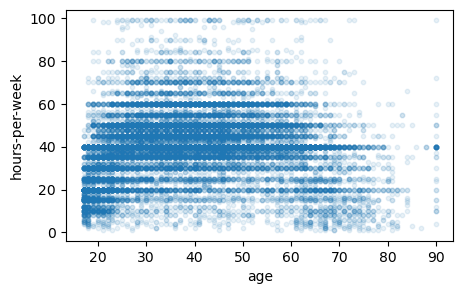

In [12]:
df.plot.scatter('age','hours-per-week',figsize=(5,3),alpha=0.1,s=10) # alpha=0.1,s=10
plt.show()

### Continuous vs. continuous columns
- heatmap

In [13]:
nbins = 40

heatmap, xedges, yedges = np.histogram2d(df['age'], df['hours-per-week'], bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

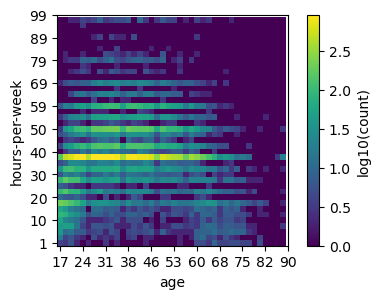

In [14]:
heatmap[heatmap == 0] = 0.1 # we will use log and log(0) is undefined
plt.figure(figsize=(5,3))

plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0) # use log count
#plt.imshow(heatmap.T, origin='lower',vmin=0) # use log count
plt.xlabel('age')
plt.ylabel('hours-per-week')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='log10(count)')
plt.show()

### Categorical vs. categorical columns
- stacked bar plot

In [15]:
count_matrix = df.groupby(['race', 'gross-income']).size().unstack()
print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

gross-income        <=50K  >50K
race                           
Amer-Indian-Eskimo    275    36
Asian-Pac-Islander    763   276
Black                2737   387
Other                 246    25
White               20699  7117
gross-income           <=50K      >50K
race                                  
Amer-Indian-Eskimo  0.884244  0.115756
Asian-Pac-Islander  0.734360  0.265640
Black               0.876120  0.123880
Other               0.907749  0.092251
White               0.744140  0.255860


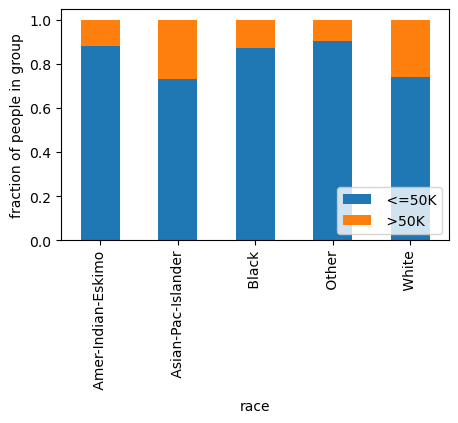

In [16]:
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(5,3))
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

### Continuous vs. categorical columns
- category-specific histograms

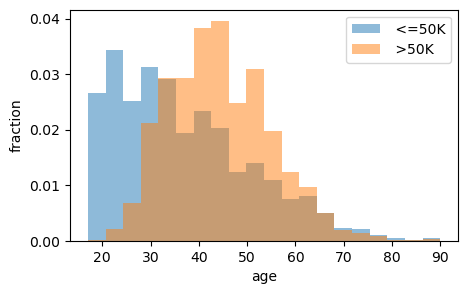

In [17]:
import matplotlib
from matplotlib import pylab as plt

categories = df['gross-income'].unique()
bin_range = (df['age'].min(),df['age'].max())

plt.figure(figsize=(5,3))

for c in categories:
    plt.hist(df[df['gross-income']==c]['age'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('age')
plt.show()

### Continuous vs. categorical columns
- box plot

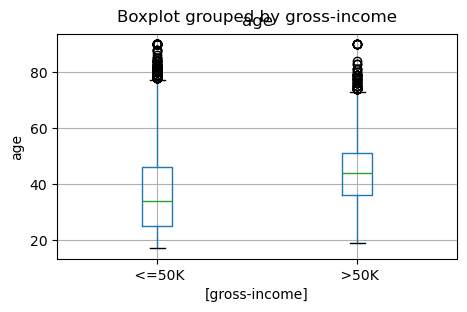

In [18]:
df[['age','gross-income']].boxplot(by='gross-income',figsize=(5,3))
plt.ylabel('age')
plt.show()

### Continuous vs. categorical columns
- violin plot

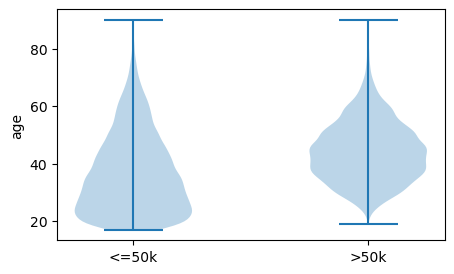

In [19]:
dataset = [df[df['gross-income']==' <=50K']['age'].values,
           df[df['gross-income']==' >50K']['age'].values]

plt.figure(figsize=(5,3))

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['<=50k','>50k'])
plt.ylabel('age')
plt.show()

In [20]:
help(plt.violinplot)

Help on function violinplot in module matplotlib.pyplot:

violinplot(dataset: 'ArrayLike | Sequence[ArrayLike]', positions: 'ArrayLike | None' = None, *, vert: 'bool | None' = None, orientation: "Literal['vertical', 'horizontal']" = 'vertical', widths: 'float | ArrayLike' = 0.5, showmeans: 'bool' = False, showextrema: 'bool' = True, showmedians: 'bool' = False, quantiles: 'Sequence[float | Sequence[float]] | None' = None, points: 'int' = 100, bw_method: "Literal['scott', 'silverman'] | float | Callable[[GaussianKDE], float] | None" = None, side: "Literal['both', 'low', 'high']" = 'both', data=None) -> 'dict[str, Collection]'
    Make a violin plot.

    Make a violin plot for each column of *dataset* or each vector in
    sequence *dataset*.  Each filled area extends to represent the
    entire data range, with optional lines at the mean, the median,
    the minimum, the maximum, and user-specified quantiles.

    Parameters
    ----------
    dataset : Array or a sequence of vectors.


## Quiz 2
Pair the column name(s) with the appropriate visualization type!

### <font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
   - <font color='LIGHTGRAY'> visualize one column (categorical, ordinal, and continuous data)</font>
   - <font color='LIGHTGRAY'>visualize column pairs (all variations of continuous and categorical columns)</font>
   - **visualize multiple columns simultaneously**

#### Scatter matrix

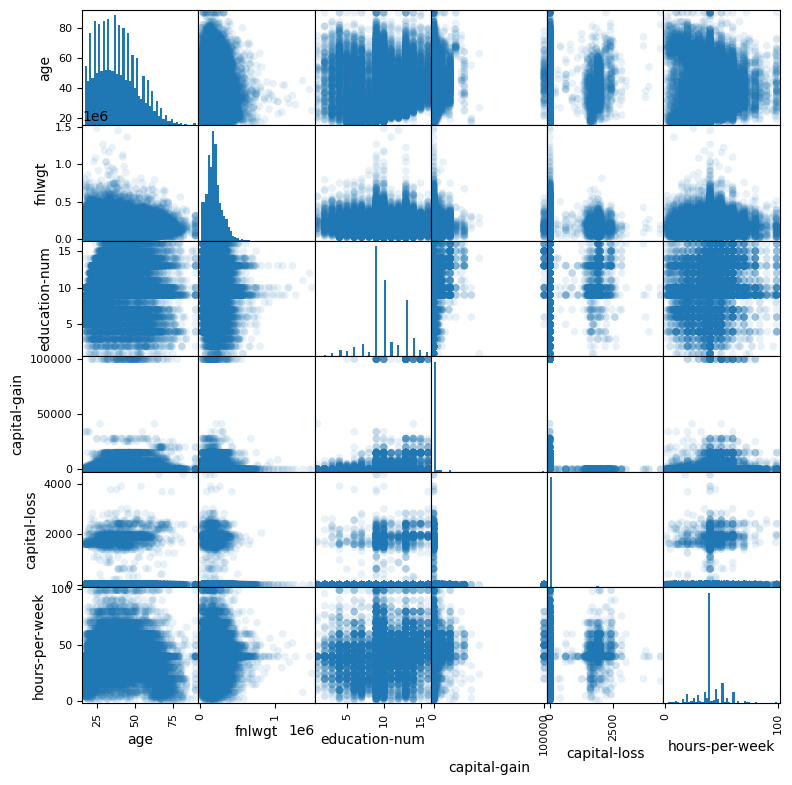

In [21]:
pd.plotting.scatter_matrix(df.select_dtypes(int), figsize=(9, 9), marker='o',hist_kwds={'bins': 50}, 
                           s=30, alpha=.1)
plt.show()

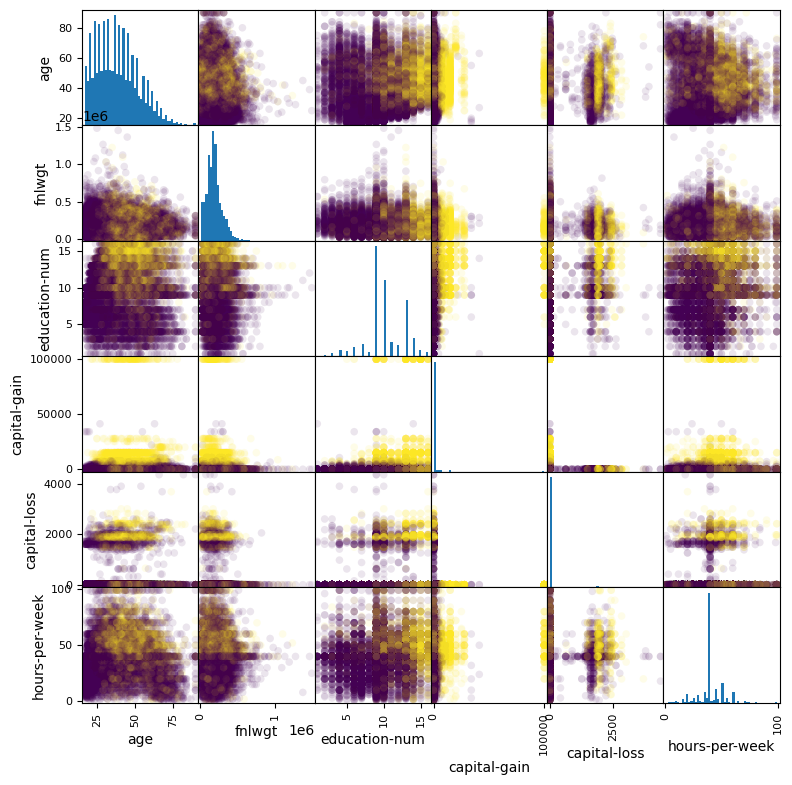

In [22]:
pd.plotting.scatter_matrix(df.select_dtypes(int), figsize=(9, 9),c = pd.get_dummies(df['gross-income']).iloc[:,1], 
                           marker='o',hist_kwds={'bins': 50}, s=30, alpha=.1)
plt.show()

### By now, you can
   - visualize one column (continuous or categorical data)
   - visualize column pairs (all variations of continuous and categorical columns)
   - visualize multiple columns simultaneously

## [Matplotlib cheatsheets!](https://github.com/matplotlib/cheatsheets)

The cheatsheets in this repo are excellent. Feel free to use them any time!

## Other great resources for visualization

DATA1500 - Data Visualization & Narrative (Course offered in the spring term)

https://www.data-to-viz.com/

https://pyviz.org/

# Mud card